<a href="https://colab.research.google.com/github/Leonaxi/Machine-Learning-in-Finance/blob/main/L11_options_and_neural_nets_with_error_original.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install optax

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

import optax
import numpy as np
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt

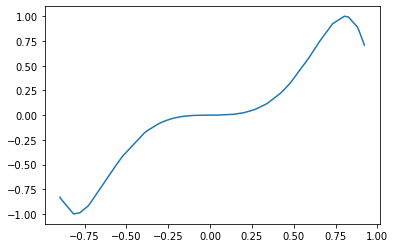

In [ ]:
S = np.array([-0.8964536 , -0.8937423 , -0.8160014 , -0.8135896 , -0.7777178 ,
       -0.7306509 , -0.7196269 , -0.56077266, -0.5225189 , -0.39259458,
       -0.37080932, -0.30425978, -0.30012155, -0.26793814, -0.23755741,
       -0.20966339, -0.16642046, -0.15392852, -0.14616823, -0.09809828,
       -0.01211524,  0.02200961,  0.0394454 ,  0.04127908,  0.14237666,
        0.1488111 ,  0.20493412,  0.25775242,  0.2756691 ,  0.32817745,
        0.3374791 ,  0.34276915,  0.34953642,  0.41928077,  0.4337349 ,
        0.43921685,  0.4798982 ,  0.5894067 ,  0.5936425 ,  0.6099713 ,
        0.64054966,  0.6516247 ,  0.7327845 ,  0.8028183 ,  0.803761  ,
        0.82667255,  0.8778291 ,  0.879761  ,  0.8880968 ,  0.92238617])

payoff = np.array([-8.30690000e-01, -8.41413975e-01, -9.98246000e-01, -9.98990000e-01,
       -9.87290919e-01, -9.20819000e-01, -8.99229109e-01, -5.04697680e-01,
       -4.15037155e-01, -1.80537000e-01, -1.52362585e-01, -8.43991116e-02,
       -8.10096189e-02, -5.76740000e-02, -4.02077623e-02, -2.76460908e-02,
       -1.38269800e-02, -1.09413229e-02, -9.36858000e-03, -2.83207800e-03,
       -5.33478988e-06,  3.19850000e-05,  1.84123986e-04,  2.11016000e-04,
        8.65829000e-03,  9.88599000e-03,  2.58175954e-02,  5.13450000e-02,
        6.28057718e-02,  1.05835974e-01,  1.15053318e-01,  1.20522849e-01,
        1.27764000e-01,  2.19326511e-01,  2.42352000e-01,  2.51461000e-01,
        3.25523138e-01,  5.76370418e-01,  5.87219000e-01,  6.29451275e-01,
        7.09268000e-01,  7.37970000e-01,  9.24770000e-01,  9.99828756e-01,
        9.99915123e-01,  9.92319000e-01,  8.96705747e-01,  8.90681505e-01,
        8.62517000e-01,  7.08453476e-01])

plt.plot(S, payoff)




In [ ]:
S  = S.reshape(50, 1)

In [ ]:
lr = 1e-3
optimizer =optax.adam


W1 = np.random.normal(size=[1, 20])
b1 = np.random.normal(size=[1, 20])

W2 = np.random.normal(size=[20, 1])
b2 = np.random.normal(size=[1, 1])

Θ = W1, W2, b1, b2
opt_state = optimizer(lr).init(Θ)


def nnet(Θ, S):
  W1, W2, b1, b2 = Θ

  # Linear transf.
  out = (S @ W1) + b1

  # Non-linear transf.
  out = jax.nn.relu(out)

  # Linear transf.
  out = out @ W2 + b2

  # squeeze
  out = jnp.squeeze(out)
  return out

def mse(prediction, y):
    return ((prediction - y)**2).mean()

@jax.jit
def update(Θ, opt_state):
    def L(Θ):
      predictions  = nnet(Θ, S)
      return mse(predictions, payoff)

    grads = jax.grad(L)(Θ)
    updates, opt_state = optimizer(lr).update(grads, opt_state)
    Θ = optax.apply_updates(Θ, updates)
    return Θ,  opt_state



In [ ]:
for iteration in range(100000):
  Θ, opt_state = update(Θ, opt_state)

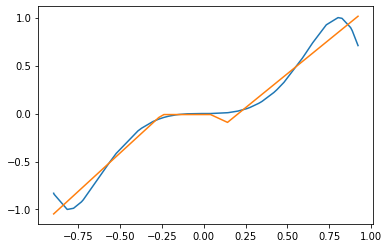

In [ ]:
prediction = nnet(Θ, S)

plt.plot(S, payoff)
plt.plot(S, prediction)

